# Modeling and Simulation in Python

Starter code for the orbit example

Copyright 2017 Allen Downey

License: [Creative Commons Attribution 4.0 International](https://creativecommons.org/licenses/by/4.0)


Alexandra Maycock- Studio 2

In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

In [2]:
# units we'll need

s = UNITS.second
N = UNITS.newton
kg = UNITS.kilogram
m = UNITS.meter

<Unit('meter')>

In [13]:
# And an initial condition (with everything in SI units)


x = 147e9
y = 0
vx = 0 
vy = -30330

init = State(x = x * m,
             y = y * m,
             vx = vx * m/s,
             vy = vy *m/s)

,values
x,147000000000.0 meter
y,0 meter
vx,0.0 meter / second
vy,-30330.0 meter / second


In [17]:
# Making a system object

r_earth = 6.371e6 * m
r_sun = 695.508e6 * m

system = System(init=init,
                G=6.674e-11 * N / kg**2 * m**2,
                m1=1.989e30 * kg,
                r_final=r_sun + r_earth,
                m2=5.972e24 * kg,
                t_0=0 * s,
                t_end=3.154e7* s)

,values
init,x 147000000000.0 meter y ...
G,6.674e-11 meter ** 2 * newton / kilogram ** 2
m1,1.989e+30 kilogram
r_final,701879000.0 meter
m2,5.972e+24 kilogram
t_0,0 second
t_end,31540000.0 second


In [5]:
# function that computes the force of gravity

def universal_gravitation(state, system):
    x, y, vx, vy= state
    unpack(system)
    
    sun_to_earth = Vector(x,y)
    
    r = sqrt(x**2 + y**2)
    
    direction = -sun_to_earth.hat()
    magnitude = G * m1 * m2 / r**2
    
    grav_force = direction * magnitude
    return grav_force

In [7]:
#applies effects of gravity to the earth's postion and velocity
def slope_function(state, t, system):
    x, y, vx, vy = state
    unpack(system)
    
    v = Vector(vx,vy)
    
    a_grav = universal_gravitation(state, system)/m2
    
    
    a = a_grav
    
    return vx, vy, a.x, a.y

In [8]:
#test the slope function

slope_function(init, 0, system)

(<Quantity(0.0, 'meter / second')>,
 <Quantity(0.0, 'meter / second')>,
 <Quantity(-0.006143082049146188, 'newton / kilogram')>,
 <Quantity(-0.0, 'newton / kilogram')>)

In [18]:
#  run the simulation

results, details = run_ode_solver(system, slope_function)
details

,values
sol,None
t_events,[]
nfev,152
njev,0
nlu,0
status,0
message,The solver successfully reached the end of the...
success,True


In [10]:
#conversions

day = results.index/86400

def convert_m(meters):
    
    #meters to kilometers
    km = meters/1000
    
    #kilometers to million kilometers
    Mkm = km/1e6
    
    return Mkm

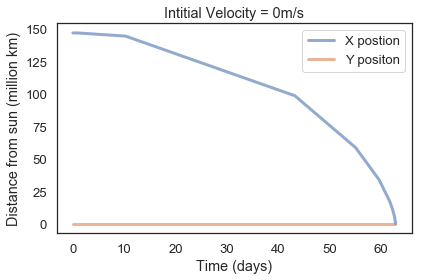

In [12]:
#Zero Initial Velocity
plot(day,convert_m(results.x), label = 'X postion')
plot(day,convert_m(results.y), label = 'Y positon')
decorate(title = 'Intitial Velocity = 0m/s',
         xlabel='Time (days)',
         ylabel='Distance from sun (million km)')

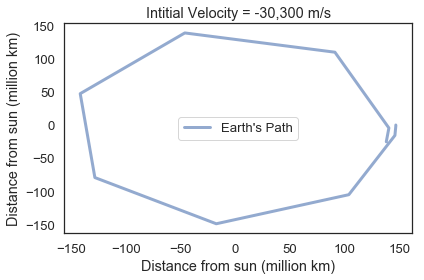

In [31]:
#One year with intial velocity -30330m/s

plot(convert_m(results.x),convert_m(results.y), label ='Earth\'s Path')
decorate(title = 'Intitial Velocity = -30,300 m/s',
         xlabel='Distance from sun (million km)',
         ylabel='Distance from sun (million km)')